<a href="https://colab.research.google.com/github/VGuerrero07/Data_Science/blob/master/An%C3%A1lise_de_Dados_de_Viol%C3%AAncia_do_RJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados de Violência no Estado do Rio de Janeiro

<img alt="Colaboratory logo" width="50%" src="https://revistacapitaleconomico.com.br/wp-content/uploads/2019/11/melhor-lugar-para-se-morar-no-rio-de-janeiro.jpg">


Com a maior exigência da população por transparência de órgãos públicos, vide os grandes escândalos envolvendo diversos governantes em nosso país, diversas fontes de dados são disponibilizadas para o cidadão.

É o caso de base de dados que envolvem violência. uma vez que é um dos mais graves problemas do Brasil. Matérias envolvendo este tema são ainda bastante frequentes em telejornais e na internet, além do grande apelo que este tema ganhou no imaginário popular.

O governo do RJ, um dos estados mais conhecidos quando se trata deste assunto, disponibiliza diversos *datasets* no portal [ISP Dados Abertos](http://www.ispdados.rj.gov.br/estatistica.html). Neste projeto, farei uma breve análise de indicadores de violêcia do Estado do RJ, utilizando a linguagem Python.





## Por que o Rio de Janeiro?

O Estado do Rio de Janeiro é uma das 27 unidades federativas do Brasil, localizado na região Sudeste. É o 3º Estado mais populoso do país, e é o 2º colocado em PIB. Outra informação interessante: mesmo sendo um dos 3 menores estados do país, concentra quase 8,5% da população brasileira!

É um estado bastante conhecido por estrangeiros: sua capital homônima é a [cidade brasileira mais visitada dos turistas](https://exame.com/brasil/os-10-destinos-brasileiros-preferidos-pelos-turistas/), por causa de suas diversas praias, paisagens belíssimas, pontos turísticos muito famosos (como o Pão de Açúcar e a estátua do Cristo Redentor, uma das [7 maravilhas do mundo moderno](https://www.travelchannel.com/interests/outdoors-and-adventure/articles/new-seven-wonders-of-the-world)).

Infelizmente, nem tudo são flores: o estado também é bem conhecido pela violência. Diversas vezes, cidades fluminenses são alvos de notícias em telejornais e programas de televisão por causa de casos de violência em seus territórios.

## Obtenção dos dados

Os dados podem ser obtidos através do portal [ISP Dados Abertos](http://www.ispdados.rj.gov.br/estatistica.html), uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](http://www.ispdados.rj.gov.br/Arquivos/DOMensalEstadoDesde1991.csv), ou então no meu [GitHub](https://raw.githubusercontent.com/VGuerrero07/Data_Science/master/datasets/DOMensalEstadoDesde1991.csv).

É importante dizer que o separador utilizado não é `,`, mas sim `;`. Por isso, devemos adaptar a leitura.

### Importando os dados

In [ ]:
# importação das biliotecas que serão utilizadas no projeto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/VGuerrero07/Data_Science/master/datasets/DOMensalEstadoDesde1991.csv',delimiter=";")

## Análise preliminar do Dataset

A primeira etapa deste projeto, após a importação dos dados, é ter conhecimento do nosso conjunto de dados. Dessa forma, algumas análises preliminares estão elencadas abaixo.

In [ ]:
# verificar o tamanho do noso conjunto de dados

print('Linhas (entradas): ', df.shape[0])
print('Colunas (variáveis): ', df.shape[1])

Linhas (entradas):  352
Colunas (variáveis):  58


Agora sabemos a extensão do nosso conjunto de dados. Vamos dar uma olhada em suas colunas:

In [ ]:
df.columns

Index(['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_comercio', 'roubo_residencia', 'roubo_veiculo', 'roubo_carga',
       'roubo_transeunte', 'roubo_em_coletivo', 'roubo_banco',
       'roubo_cx_eletronico', 'roubo_celular', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mor

As colunas representam o tipo de ocorrência, em sua maioria, além do ano e do mês que elas ocorreram.

Agora vamos analisar os tipos de dados que temos nas linhas. Esta informação é importante para direcionar nosso trabalho de limpeza de dados, que veremos mais para a frente.

In [ ]:
df.dtypes

ano                            int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_comercio                 int64
roubo_residencia               int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_transeunte               int64
roubo_em_coletivo              int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_celular                 object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
total_roubos                   int64
furto_veiculos                 int64
f

Percebemos que há um problema com o tipo dos dados de nossa base de dados. Vamos olhar as 5 primeiras entradas para confirmar esta hipótese:

In [ ]:
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
0,1991,1,657,,15,,672,162,3051,,,,350,188,1174,63,967,381,37,,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,1348,1174,63,,3
1,1991,2,732,,17,,749,175,3421,,,,357,171,1097,64,963,432,35,,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,1395,1097,64,,3
2,1991,3,713,,25,,738,216,3613,,,,443,191,1265,71,963,422,43,,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,1385,1265,71,,3
3,1991,4,634,,20,,654,200,3211,,,,425,199,1415,81,1186,354,36,,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,1540,1415,81,,3
4,1991,5,650,,20,,670,146,3051,,,,553,231,1449,82,931,335,27,,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,1266,1449,82,,3


Notamos que há um grande número de dados em branco. Isto influencia o tipo dos dados para `object` (uma cadeia de texto contendo apenas um espaço em branco).

Iremos substituir os valores de espaço em branco por valores nulos (`NaN`), de modo que sejam mais fáceis de identificar.


In [ ]:
# criando uma cópia do dataset
df_nan = df.copy()

# substituindo as strings para NaN
df_nan.replace(r'^\s*$', value=np.nan, regex=True, inplace=True)

# mudando o tipo das colunas alteradas, de object para float.
for i in df_nan.columns:
  if isinstance(df_nan[i].dtype, object):
    df_nan[[i]] = df_nan[[i]].apply(pd.to_numeric)

df_nan.dtypes

ano                             int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_comercio                  int64
roubo_residencia                int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_transeunte                int64
roubo_em_coletivo               int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_celular                 float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubos                   int64
total_roubos                    int64
furto_veicul

Agora, com mais facilidade, podemos sugerir algumas hipóteses para os motivos de isso ocorrer, e como podemos contornar este problema para continuar nossa análise:

* Como temos dados registrados desde o ano de 1991, alguns desses crimes poderiam não estar sendo contabilizados pelo órgão que coletou esses dados e gerou esse dataset. Estarem ausentes não significa que não existiram, e vamos pensar em formas de lidar com essa ausência logo mais.

* Infelizmente, a cultura de dados do Brasil, embora seja mais robusta hoje em dia, deixa a desejar. Desta forma, considerando que a série histórica é bem antiga (desde 1991), podemos considerar que a robustez não é das mais desejadas. Ainda, devemos levar em consideração também o formato em que esses dados eram registrados à época: será que foram registrados corretamente e perdidos em períodos de digitalização? Ou será que o gerenciamento dessas informações sempre foi falho?

Antes de decidirmos o que fazer em relação aos dados ausentes, vamos verificar a proporção deles em relação à totalidade do dataset.

In [ ]:
# analisando a proporção de dados ausentes em nosso dataset
(df_nan.isnull().sum()/df_nan.shape[0]).sort_values(ascending=False)

roubo_bicicleta               0.784091
furto_bicicleta               0.784091
cmba                          0.511364
cmp                           0.511364
posse_drogas                  0.511364
trafico_drogas                0.511364
apreensao_drogas_sem_autor    0.511364
apf                           0.511364
aaapai                        0.511364
sequestro_relampago           0.409091
estelionato                   0.409091
roubo_conducao_saque          0.409091
furto_coletivo                0.409091
roubo_apos_saque              0.409091
pol_militares_mortos_serv     0.409091
pol_civis_mortos_serv         0.409091
furto_celular                 0.409091
roubo_cx_eletronico           0.409091
estupro                       0.409091
extorsao                      0.409091
pessoas_desaparecidas         0.375000
encontro_ossada               0.375000
roubo_celular                 0.306818
registro_ocorrencias          0.272727
lesao_corp_culposa            0.272727
sequestro                

Podemos perceber que temos variáveis com números consideráveis de valores faltantes, como é o caso de casos envolvendo bicicleta e posse de drogas.

Por ser uma série histórica (isto é, dados no passar do tempo), podemos analisar os diversos dados a partir da data em que começaram a ser registrados.

Além disso, existem outras formas de encararmos e explorarmos os dados, como:

* Números anuais por crime.
* Números mensais por crime.
* Categorias de crimes (Contra a vida, Contra o patrimônio, etc.)

## Análise dos Dados

Agora, podemos utilizar o método `describe()` para visualizar a distribuição estatística do *dataset*.

Vamos fazer um agrupamento dos dados por ano (1991-2019) para fazer esta análise. Os dados de 2020, presentes no *dataset*, não serão considerados por agora uma vez que eles podem interferir nos resultados estatísticos da análise.


In [ ]:
# Selecionando todos os dados sem contar 2020
df_no2020 = df_nan[df_nan.ano != 2020]

dados_anuais = df_no2020.groupby('ano').sum()

dados_anuais.drop(columns=['mes'], inplace=True)

# mostrar as últimas 5 entradas
dados_anuais.tail()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
ano,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015,4200,32.0,133,645.0,5010,6009,77376,4887.0,1784.0,40371.0,6756,1188,31035,7225,65437,7805,27,33.0,12038.0,83.0,1418.0,118.0,14770,147933,16944,38348,10774.0,19187.0,1086.0,93506,179845,4.0,2028.0,133.0,35595.0,28089,12062.0,13961.0,2614.0,23663,36032.0,10364.0,20202.0,894.0,74932.0,6348.0,533,48.0,23.0,2.0,4365.0,85280,31035,7225,777356.0,36
2016,5042,56.0,239,925.0,6262,6055,70023,4705.0,1783.0,34950.0,7288,1318,41696,9874,93818,13731,24,51.0,19549.0,72.0,777.0,191.0,20392,208781,16759,29275,10252.0,17574.0,2013.0,93365,169238,12.0,1613.0,69.0,36912.0,25016,9959.0,13256.0,2264.0,28690,35745.0,10101.0,16331.0,1143.0,64848.0,5905.0,541,37.0,38.0,2.0,5337.0,127098,41696,9874,806042.0,36
2017,5346,39.0,237,1127.0,6749,6001,60555,4952.0,2112.0,26872.0,6600,1258,54366,10599,85993,15273,22,60.0,24380.0,56.0,690.0,146.0,30994,230437,15708,19163,7541.0,15627.0,1924.0,85327,145290,8.0,1457.0,111.0,29472.0,21312,7582.0,12173.0,1971.0,37630,33355.0,7545.0,16900.0,1667.0,51035.0,4631.0,377,25.0,31.0,4.0,5622.0,125646,54366,10599,750607.0,36
2018,4950,56.0,174,1534.0,6714,6242,63282,5310.0,1957.0,27520.0,6437,1249,52097,9182,88422,15660,21,58.0,26538.0,83.0,941.0,159.0,30759,231606,15794,20440,8316.0,15718.0,1901.0,81701,143870,4.0,1554.0,107.0,34493.0,21626,7963.0,12034.0,2026.0,36448,33548.0,6546.0,15780.0,2281.0,56009.0,4780.0,350,27.0,28.0,4.0,5180.0,130620,52097,9182,770467.0,36
2019,4004,45.0,117,1814.0,5980,5409,63655,5450.0,1979.0,27628.0,5005,1130,39749,7456,78329,15354,20,37.0,26788.0,121.0,1071.0,189.0,24065,199314,15595,20253,7924.0,18343.0,2470.0,89937,154522,2.0,1661.0,101.0,41253.0,22749,9004.0,12092.0,2086.0,26863,35219.0,6056.0,19461.0,3112.0,60308.0,4768.0,298,51.0,22.0,0.0,4166.0,120471,39749,7456,781522.0,36


In [ ]:
# exemplo apenas com alguns crimes
dados_anuais[['hom_doloso', 'latrocinio', 'estupro', 'sequestro', 'trafico_drogas', 'total_roubos', 'total_furtos']].describe()

,hom_doloso,latrocinio,estupro,sequestro,trafico_drogas,total_roubos,total_furtos
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,6029.448276,187.000000,2615.413793,5.758621,4418.724138,113831.551724,125449.655172
std,1265.074153,46.381185,2381.905293,5.865487,5310.259497,54533.127517,43894.839705
min,4004.000000,117.000000,0.000000,0.000000,0.000000,42784.000000,59986.000000
25%,4950.000000,148.000000,0.000000,0.000000,0.000000,62368.000000,80007.000000
50%,6133.000000,192.000000,3200.000000,5.000000,0.000000,113437.000000,126333.000000
75%,6885.000000,221.000000,4871.000000,10.000000,8917.000000,138280.000000,169238.000000
max,8438.000000,288.000000,6075.000000,24.000000,13961.000000,231606.000000,182815.000000


In [ ]:
#gerando dados estatísticos de todos os crimes
dados_anuais.describe()

,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.0
mean,6029.448276,37.793103,187.000000,664.103448,6918.344828,3828.965517,65891.137931,2615.413793,1927.275862,29490.448276,5447.275862,1592.275862,29451.344828,4112.068966,41330.448276,7962.586207,111.448276,24.931034,8076.206897,79.344828,1017.965517,27.689655,14597.965517,113831.551724,20030.000000,18223.551724,4571.000000,10209.793103,323.931034,72091.379310,125449.655172,5.758621,937.379310,54.655172,15911.965517,12962.793103,3550.655172,4418.724138,1073.379310,21280.206897,13498.344828,3280.586207,7325.068966,503.137931,47973.689655,3235.965517,788.758621,24.862069,14.655172,2.344828,4143.206897,57369.241379,29451.344828,4112.068966,468529.689655,36.0
std,1265.074153,28.497342,46.381185,518.651710,1105.277511,1480.636096,17303.554595,2381.905293,1218.864574,20048.649302,1225.592157,502.274391,9088.074994,2564.917639,29362.568037,3368.783434,117.070975,25.334802,8193.366997,82.250174,992.697425,62.817254,9322.630187,54533.127517,3347.642422,11006.781321,4578.921972,9265.337321,746.540446,23225.604963,43894.839705,5.865487,851.813084,55.210814,15299.678611,7728.949732,4233.372147,5310.259497,1159.261323,7617.922286,15181.437089,3992.497585,8124.359988,752.654527,31876.415774,2620.503080,358.290849,21.258148,14.960128,2.943223,2726.228653,38330.673181,9088.074994,2564.917639,314010.507826,0.0
min,4004.000000,0.000000,117.000000,0.000000,4666.000000,1741.000000,35697.000000,0.000000,0.000000,0.000000,3610.000000,896.000000,16452.000000,1021.000000,9780.000000,4249.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1337.000000,42784.000000,15593.000000,5389.000000,0.000000,0.000000,0.000000,31168.000000,59986.000000,0.000000,0.000000,0.000000,0.000000,1749.000000,0.000000,0.000000,0.000000,9890.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,298.000000,0.000000,0.000000,0.000000,0.000000,14502.000000,16452.000000,1021.000000,0.000000,36.0
25%,4950.000000,0.000000,148.000000,289.000000,6210.000000,2418.000000,55794.000000,0.000000,1783.000000,0.000000,4652.000000,1258.000000,23676.000000,2619.000000,12893.000000,5175.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10337.000000,62368.000000,17668.000000,9299.000000,0.000000,0.000000,0.000000,49391.000000,80007.000000,0.000000,0.000000,0.000000,0.000000,8904.000000,0.000000,0.000000,0.000000,16030.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,519.000000,0.000000,0.000000,0.000000,0.000000,20086.000000,23676.000000,2619.000000,0.000000,36.0
50%,6133.000000,41.000000,192.000000,592.000000,7083.000000,4022.000000,72638.000000,3200.000000,2373.

Temos muitos dados na tabela acima.

* Percebemos que temos uma quantidade de 6029, em média, de homicídios intencionais (`hom_doloso`), uma média de 502 casos por mês. Isto significa que, em média, **16,7 pessoas são assassinadas no estado do Rio de Janeiro diariamente**.
* Outro tipo de violência bastante comentada é o de `estupro`. Temos uma média apontada de 2615 casos por ano, o que representa cerca de **7 casos por dia**. É importante dizer que 25% dos casos de estupro são nulos; isto pode ser explicado pela crescente preocupação com este tipo de violência com o passar dos anos.

Além disso, a análise estatística de crimes que contém muitos valores faltantes, como é o caso mesmo do estupro, não é muito útil por causa da interferência que isto causa nos valores estatísticos.

### Analisando alguns tipos de crime

Nesta seção, vamos fazer uma análise rápida de algumas categorias de casos. Vamos considerar dois tipos de crimes:

* Crimes contra o patrimônio
* Crimes contra a vida

Para o primeiro caso, vamos considerar os dados de furto e roubo de veículos (`roubo_veiculo` e `furto_veiculo`), além do número de veículos recuperados (`recuperacao_veiculos`), para verificar a eficiência em recuperar carros e 

Para o segundo, vamos analisar os casos de homicídio doloso (`hom_doloso`), identificando o momento de mínimo e máximo para ambos os casos.

#### Crimes contra o patrimônio - veículos

Vamos, nesta seção, identificar a quantidade média de veículos recuperados pela polícia do RJ que foram roubados ou furtados.

In [ ]:
mean_roubo = df_nan.roubo_veiculo.mean()

print(f'A média mensal de veículos roubados no estado do RJ é de {round(mean_roubo, 2)}')

mean_furto = df_nan.furto_veiculos.mean()

print(f'A média mensal de veículos furtados no estado do RJ é de {round(mean_furto, 2)}')

print(f'A média mensal do total de veículos perdidos é {round(mean_furto + mean_roubo, 2)}\n')

# cálculo da quantidade de carros recuperados
mean_recuperados = df_nan.recuperacao_veiculos.mean()

print(f'A média mensal de veículos recuperados no estado do RJ é de {round(mean_recuperados, 2)}')

# cálculo da taxa de recuperação
taxa_recuperacao = mean_recuperados/(mean_furto + mean_roubo)*100

print('{:.2f}% dos carros roubados ou furtados são recuperados pela polícia.'.format(taxa_recuperacao))

A média mensal de veículos roubados no estado do RJ é de 2456.13
A média mensal de veículos furtados no estado do RJ é de 1663.22
A média mensal do total de veículos perdidos é 4119.34

A média mensal de veículos recuperados no estado do RJ é de 1771.82
43.01% dos carros roubados ou furtados são recuperados pela polícia.


#### Crimes contra a vida

Agora, o objetivo é identificar os pontos de máximo e mínimo para os crimes de homicídio doloso e de latrocínio.

In [ ]:
max_homicidio_doloso = df.hom_doloso.max()
min_homicidio_doloso = df.hom_doloso.min()

print(f'A quantidade máxima e mínima, em um mês, de homicídios dolosos no Rio de Janeiro foram {max_homicidio_doloso} e {min_homicidio_doloso}')

A quantidade máxima e mínima, em um mês, de homicídios dolosos no Rio de Janeiro foram 831 e 272


Investigando esses dados mais a fundo, podemos encontrar quando esses valores foram marcados.

In [ ]:
# verificando o mês com maior número de homicídios
df[df.hom_doloso == 831]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
48,1995,1,831,,17,,848,166,3626,,,,323,174,2060,188,1056,377,38,,,,,,134,4350,1924,520,,,,2941,5385,,,,,147,,,,1435,,,,,,,98,,,,,1433,2060,188,,3


In [ ]:
# verificando o mês com menor número de homicídios
df[df.hom_doloso == 272]

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_comercio,roubo_residencia,roubo_veiculo,roubo_carga,roubo_transeunte,roubo_em_coletivo,roubo_banco,roubo_cx_eletronico,roubo_celular,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_cvli,indicador_roubo_rua,indicador_roubo_veic,indicador_roubo_carga,registro_ocorrencias,fase
293,2015,6,272,2,16,44,334,477,5535,389,140,3369,465,96,2254,566,4421,619,3,1,896,5,106,3,1243,10678,1333,2974,968,1514,5,7475,14269,0,192,10,2940,2134,845,1134,204,1768,3128,798,1676,57,5678,493,52,4,1,1,290,5936,2254,566,60357,3


Vemos que o maior número de homicídios foi atingido no mês de janeiro de 1995, enquanto o menor número ocorreu em junho de 2015. 

Isto pode ser um bom sinal, indicando queda no número com o passar do tempo.

## Visualização de Dados

A última etapa será a de visualização de dados, em séries temporais.

Para isso, escolheremos os dados de `registro_ocorrencias`, `total_furtos`, e`total_roubos`.

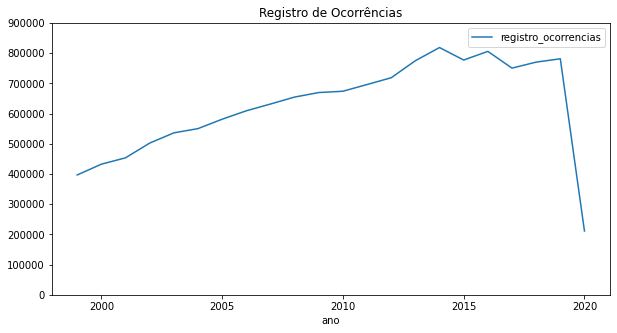

In [ ]:
# agrupar os valores por ano
dados_serie = df_nan.groupby('ano').sum()

# Selecionar apenas a partir do momento que começou a ser considerado
dados_serie_registro = dados_serie[dados_serie.registro_ocorrencias != 0]

dados_serie_registro.plot(y='registro_ocorrencias', figsize = (10, 5), ylim = (0, 900000), title='Registro de Ocorrências');
# dados_serie.plot(x='ano', y='registro_ocorrencias')

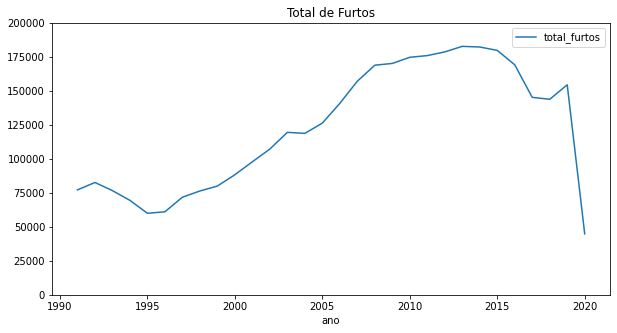

In [ ]:
# Selecionar apenas a partir do momento que começou a ser considerado
dados_serie_furtos = dados_serie[dados_serie.total_furtos != 0]

dados_serie_furtos.plot(y='total_furtos', figsize = (10, 5), ylim = (0, 200000), title='Total de Furtos');
# dados_serie.plot(x='ano', y='registro_ocorrencias')

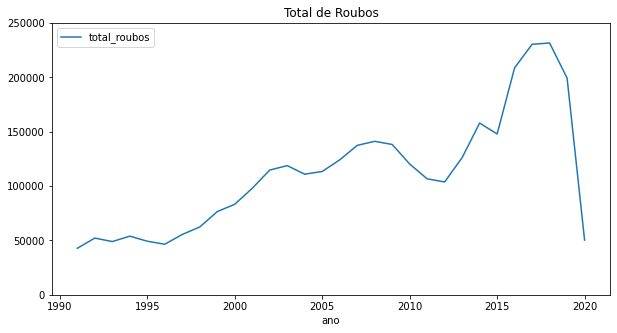

In [ ]:
# Selecionar apenas a partir do momento que começou a ser considerado
dados_serie_roubos = dados_serie[dados_serie.total_roubos != 0]

dados_serie_roubos.plot(y='total_roubos', figsize = (10, 5), ylim = (0, 250000), title='Total de Roubos');
# dados_serie.plot(x='ano', y='registro_ocorrencias')

Percebemos, ao analisarmos a série histórica de roubos, furtos, e total de ocorrências, percebemos que há um aumento gradativo desde o início. Este é um dado bastante preocupante para a população, que cada vez mais sofre nas mãos dos criminosos.

Contudo, podemos perceber que há uma leve diminuição no número dos casos no ano de 2020 (mesmo que sejam apenas 4 meses de dados). Isso pode representar uma real tendência de diminuição destes 3 tipos de crimes, o que seria um dado excelente.

Por fim, aind ahá a possibilidade da quantidade de crimes apresentada ter apenas aumentado por causa de um registro mais bem feito e de uma cultura de dados mais robusta, o que não corresponderia a mais crimes sendo cometidos e sim a mais crimes sendo contabilizados. Porém, apenas uma análise mais profunda pode responder isso.

## Conclusão

Ao realizar este projeto, percebe-se a importância de identificar e analisar o seu conjunto de dados, de modo a perceber sua qualidade, quais os tipos de dados e se há dados faltantes que impactam as análises.

Dados "sujos", por assim dizer, são bem comuns quando retirados de fontes diretas e oficiais, diferente da maioria retirada de concursos ou de cursos.

Finalmente, sobre a análise em si, percebemos uma evolução considerável no número de ocorrências no estado desde 1991, o que faz com que a visita a ele seja feita cada vez com mais atenção e cuidado.